# Comparitive study on MongoDB and Cosmos DB

### Import Libraries

In [1]:
import certifi
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pymongo import MongoClient
from urllib.parse import quote_plus

### Connecting to MongoDB cluster

In [2]:
# Set the path to the Certifi CA bundle
cafile = certifi.where()

# Connect to MongoDB Atlas
username = "aaric"
password = "Kishan@2001"
cluster_name = "Cluster0"

# Escape the username and password
escaped_username = quote_plus(username)
escaped_password = quote_plus(password)

# Construct the connection string with escaped credentials
connection_string = f"mongodb+srv://{escaped_username}:{escaped_password}@{cluster_name}.45dnv1b.mongodb.net/retryWrites=true&w=majority"

# Connect to MongoDB Atlas
client = MongoClient(connection_string, tlsCAFile=cafile)

### Database creation in MongoDB

the database is already created and need not to be run again therefore, they are commented to avoid duplication

In [3]:
def create_DB(database_name):
    ''' 
    Create a database if it doesn't exist

    Parameters:
    database_name (str): The name of the database to create

    Returns:
    db (pymongo.database.Database): The created database
    '''

    existing_databases = client.list_database_names()
    if database_name in existing_databases:
        db = client[database_name]
        print(f"Database '{database_name}' already exists.")
    else:
        db = client[database_name]
        print(f"Database '{database_name}' created.")
    return db

In [4]:
db =create_DB("GeoDB")

Database 'GeoDB' already exists.


In [5]:
def create_collection(db, collection_name):
    '''
    Create a collection if it doesn't exist

    Parameters:
    db (pymongo.database.Database): The database to create the collection in
    collection_name (str): The name of the collection to create

    Returns:
    collection (pymongo.collection.Collection): The created collection
    '''
    existing_collections = db.list_collection_names()
    if collection_name in existing_collections:
        collection = db[collection_name]
        print(f"Collection '{collection_name}' already exists.")
    else:
        collection = db[collection_name]
        print(f"Collection '{collection_name}' created.")
    return collection

In [6]:
regions = create_collection(db, "regions")

Collection 'regions' already exists.


In [7]:
def ingest_data(collection, data_path):
    '''
    Ingest data from a JSON file into a MongoDB collection

    Parameters:
    collection (pymongo.collection.Collection): The collection to ingest the data into
    data_path (str): The path to the JSON file containing the data

    Returns:
    None
    '''
    # Load data from the JSON file
    with open(data_path, "r") as json_file:
        data = json.load(json_file)

    # Insert the data into the collection
    collection.insert_many(data)

    print("Data ingested successfully")

In [8]:
#ingest_data(regions, "Geo_data/regions.json")

In [9]:
subregions = create_collection(db, "subregions")
#ingest_data(subregions, "Geo_data/subregions.json")

Collection 'subregions' already exists.


In [10]:
countries = create_collection(db, "countries")
#ingest_data(countries, "Geo_data/countries.json")

Collection 'countries' already exists.


In [11]:
states = create_collection(db, "states")
#ingest_data(states, "Geo_data/states.json")

Collection 'states' already exists.


In [12]:
cities = create_collection(db, "cities")
#ingest_data(cities, "Geo_data/cities.json")

Collection 'cities' already exists.


### Querying MongoDB

In [13]:
# Load the database and collections

db = client["GeoDB"]
regions = db["regions"]
subregions = db["subregions"]
countries = db["countries"]
states = db["states"]
cities = db["cities"]

In [14]:
def get_result(result):
    '''
    Get the result of a MongoDB query as a Pandas DataFrame

    Parameters:
    result (pymongo.cursor.Cursor): The result of the query

    Returns:
    df (pandas.DataFrame): The result of the query as a Pandas DataFrame
    '''
    result_list = list(result)
    df = pd.DataFrame(result_list)
    return df

### Comparing the basic query methods used in Cosmos DB with MongoDB

***SELECT***

List all regions in the database.

In [15]:
result = regions.find({}) # get all the regions
result

The result is a cursor object, which can be viewed by iterating over it.

In [16]:
for res in result:
    print(res)

{'_id': ObjectId('66268af5ac478f9fc51a1ab5'), 'id': 1, 'name': 'Africa', 'translations': {'kr': '아프리카', 'pt-BR': 'África', 'pt': 'África', 'nl': 'Afrika', 'hr': 'Afrika', 'fa': 'آفریقا', 'de': 'Afrika', 'es': 'África', 'fr': 'Afrique', 'ja': 'アフリカ', 'it': 'Africa', 'cn': '非洲', 'tr': 'Afrika'}, 'wikiDataId': 'Q15'}
{'_id': ObjectId('66268af5ac478f9fc51a1ab6'), 'id': 2, 'name': 'Americas', 'translations': {'kr': '아메리카', 'pt-BR': 'América', 'pt': 'América', 'nl': 'Amerika', 'hr': 'Amerika', 'fa': 'قاره آمریکا', 'de': 'Amerika', 'es': 'América', 'fr': 'Amérique', 'ja': 'アメリカ州', 'it': 'America', 'cn': '美洲', 'tr': 'Amerika'}, 'wikiDataId': 'Q828'}
{'_id': ObjectId('66268af5ac478f9fc51a1ab7'), 'id': 3, 'name': 'Asia', 'translations': {'kr': '아시아', 'pt-BR': 'Ásia', 'pt': 'Ásia', 'nl': 'Azië', 'hr': 'Ázsia', 'fa': 'آسیا', 'de': 'Asien', 'es': 'Asia', 'fr': 'Asie', 'ja': 'アジア', 'it': 'Asia', 'cn': '亚洲', 'tr': 'Asya'}, 'wikiDataId': 'Q48'}
{'_id': ObjectId('66268af5ac478f9fc51a1ab8'), 'id': 4, 'n

To have a better view of the results, we can convert them to a Pandas DataFrame.

In [17]:
result = regions.find({}) # get all the regions
regions_df = get_result(result)
regions_df

,_id,id,name,translations,wikiDataId
0,66268af5ac478f9fc51a1ab5,1,Africa,"{'kr': '아프리카', 'pt-BR': 'África', 'pt': 'Áfric...",Q15
1,66268af5ac478f9fc51a1ab6,2,Americas,"{'kr': '아메리카', 'pt-BR': 'América', 'pt': 'Amér...",Q828
2,66268af5ac478f9fc51a1ab7,3,Asia,"{'kr': '아시아', 'pt-BR': 'Ásia', 'pt': 'Ásia', '...",Q48
3,66268af5ac478f9fc51a1ab8,4,Europe,"{'kr': '유럽', 'pt-BR': 'Europa', 'pt': 'Europa'...",Q46
4,66268af5ac478f9fc51a1ab9,5,Oceania,"{'kr': '오세아니아', 'pt-BR': 'Oceania', 'pt': 'Oce...",Q55643
5,66268af5ac478f9fc51a1aba,6,Polar,"{'kr': '남극', 'pt-BR': 'Antártida', 'pt': 'Antá...",Q51


***Filter***

Find all the states in united states.

In [18]:
query = {"country_name": "United States"}  # Find documents where country_name is "United States"
result = states.find(query).sort("id", 1)
states_df = get_result(result)
states_df

,_id,id,name,country_id,country_code,country_name,state_code,type,latitude,longitude
0,66268b8dac478f9fc51a2ec0,1398,Howland Island,233,US,United States,UM-84,islands / groups of islands,0.81132190,-176.61827360
1,66268b8dac478f9fc51a2eba,1399,Delaware,233,US,United States,DE,state,38.91083250,-75.52766990
2,66268b8dac478f9fc51a2eb2,1400,Alaska,233,US,United States,AK,state,64.20084130,-149.49367330
3,66268b8dac478f9fc51a2ecc,1401,Maryland,233,US,United States,MD,state,39.04575490,-76.64127120
4,66268b8dac478f9fc51a2eb6,1402,Baker Island,233,US,United States,UM-81,islands / groups of islands,0.19362660,-176.47690800
...,...,...,...,...,...,...,...,...,...,...
61,66268b8dac478f9fc51a2ec4,1459,Iowa,233,US,United States,IA,state,41.87800250,-93.09770200
62,66268b8dac478f9fc51a2ec1,1460,Idaho,233,US,United States,ID,state,44.06820190,-114.74204080
63,66268b8dac478f9fc51a2ee4,1461,Rhode Island,233,US,United States,RI,state,41.58009450,-71.47742910
64,66268b8dac478f9fc51a2eef,1462,Washington,233,US,United States,WA,state,47.75107410,-120.74013850


***Group by***

Find the number of countries in each sub regions in asian region.

The mongodb does not support group by directly in queries, so we need to use aggregation.

In [19]:
# Define the aggregation pipeline
pipeline = [
    {"$match": {"region": "Asia"}},  # Filter documents where region is "Asia"
    {"$group": {
        "_id": "$subregion",  # Group by subregion field
        "countries": {"$push": "$$ROOT"},  # Store matching documents in an array
        "count": {"$sum": 1}  # Count the number of documents in each group
    }}
]

result = countries.aggregate(pipeline)

In [20]:
result_df = get_result(result)
result_df = result_df.sort_values(by="count", ascending=False)
result_df

,_id,countries,count
3,Western Asia,"[{'_id': 66268b7dac478f9fc51a1adc, 'id': 12, '...",17
0,South-Eastern Asia,"[{'_id': 66268b7dac478f9fc51a1af1, 'id': 33, '...",11
1,Southern Asia,"[{'_id': 66268b7dac478f9fc51a1ad1, 'id': 1, 'n...",9
2,Eastern Asia,"[{'_id': 66268b7dac478f9fc51a1afd, 'id': 45, '...",8
4,Central Asia,"[{'_id': 66268b7dac478f9fc51a1b41, 'id': 112, ...",5


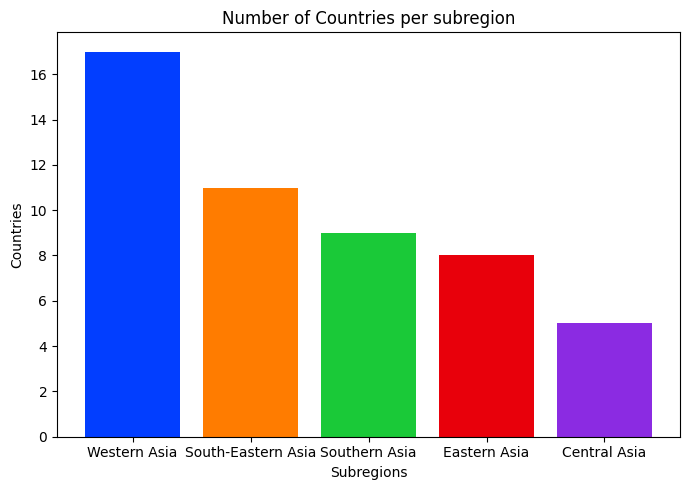

In [21]:
plt.figure(figsize=(7, 5))
colors = sns.color_palette('bright')
plt.bar(result_df["_id"], result_df["count"], color=colors) # plot the number of countries per subregion
plt.xlabel('Subregions')
plt.ylabel('Countries')
plt.title('Number of Countries per subregion')
plt.tight_layout() 
plt.show()

***Count***

Count the number of islands associated with United States

The count_documents method returns the number of documents that match the query.

In [22]:
query = {"country_name": "United States", "type": "islands / groups of islands"}  # Find documents where country_name is "United States" and type is "islands / groups of islands"
result = states.count_documents(query)
print("There are", result, "islands in the United States.")

There are 9 islands in the United States.


***Order by***

List all states in India in alphabetical order

In [23]:
query = {"country_name": "India"} # Find documents where country_name is "India"
result = states.find(query).sort("name", 1) # Sort the results by name in ascending order
result_df = get_result(result)
result_df.head()

,_id,id,name,country_id,country_code,country_name,state_code,type,latitude,longitude
0,66268b8dac478f9fc51a222a,4023,Andaman and Nicobar Islands,101,IN,India,AN,Union territory,11.74008670,92.65864010
1,66268b8dac478f9fc51a222b,4017,Andhra Pradesh,101,IN,India,AP,state,15.91289980,79.73998750
2,66268b8dac478f9fc51a222c,4024,Arunachal Pradesh,101,IN,India,AR,state,28.21799940,94.72775280
3,66268b8dac478f9fc51a222d,4027,Assam,101,IN,India,AS,state,26.20060430,92.93757390
4,66268b8dac478f9fc51a222e,4037,Bihar,101,IN,India,BR,state,25.09607420,85.31311940


***Querying sub-elements***

Find the Chinese names of countries in Americas region

In [24]:
query = {"region": "Americas"}
result = countries.find(query)
projection = {"_id": 0, "name": 1, "translations.cn": 1} # using projection to only get the name and chinese name

data_list = []
for doc in result:
    data_list.append({"country_name": doc["name"], "chinese_name": doc.get("translations", {}).get("cn")})

result_df = pd.DataFrame(data_list)
result_df.head()


,country_name,chinese_name
0,Anguilla,安圭拉
1,Antigua and Barbuda,安提瓜和巴布达
2,Argentina,阿根廷
3,Aruba,阿鲁巴
4,Barbados,巴巴多斯


***Join using aggregate***

Join the states and countries collections based on the country_id field.

In [25]:
# Define the aggregation pipeline
pipeline = [
    {
        "$lookup": {
            "from": "countries",
            "localField": "country_id",
            "foreignField": "id",
            "as": "additional_info"
        }
    },
    {
        "$project": {
            "_id": 0,
            "State_name": "$name",
            "Country_name": { "$arrayElemAt": ["$additional_info.name", 0] },
            "Subregion_name": { "$arrayElemAt": ["$additional_info.subregion", 0] },
            "Region_name": { "$arrayElemAt": ["$additional_info.region", 0] }
        }
    }
]


In [26]:
result = states.aggregate(pipeline)
result_df = get_result(result)
result_df

,State_name,Country_name,Subregion_name,Region_name
0,Badakhshan,Afghanistan,Southern Asia,Asia
1,Badghis,Afghanistan,Southern Asia,Asia
2,Baghlan,Afghanistan,Southern Asia,Asia
3,Balkh,Afghanistan,Southern Asia,Asia
4,Bamyan,Afghanistan,Southern Asia,Asia
...,...,...,...,...
5079,Mashonaland West Province,Zimbabwe,Eastern Africa,Africa
5080,Masvingo Province,Zimbabwe,Eastern Africa,Africa
5081,Matabeleland North Province,Zimbabwe,Eastern Africa,Africa
5082,Matabeleland South Province,Zimbabwe,Eastern Africa,Africa


In [27]:
# Close the connection
client.close()